<a href="https://colab.research.google.com/github/RoksanaMaya/MLGrit/blob/main/Amazon_Product_Review/3_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import re
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import  WordNetLemmatizer

In [ ]:
download('stopwords')
download('wordnet')
download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/All_Beauty_v3.parquet.parquet')

In [ ]:
df = data.copy()
df.head()

,overall,reviewTime,reviewText,summary,reviewLength
0,1,"02 19, 2015",great,One Star,1
1,4,"12 18, 2014",My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,30
2,4,"08 10, 2014","This book was very informative, covering all a...",Worth the Read,10
3,5,"03 11, 2013",I am already a baseball fan and knew a bit abo...,Good Read,23
4,5,"12 25, 2011",This was a good story of the Black leagues. I ...,"More than facts, a good story read!",67


# NLP

In [ ]:
### convert into lower case
df['reviewText'] = df.reviewText.str.lower()
df.head().reviewText

0                                                great
1    my  husband wanted to reading about the negro ...
2    this book was very informative, covering all a...
3    i am already a baseball fan and knew a bit abo...
4    this was a good story of the black leagues. i ...
Name: reviewText, dtype: object

In [ ]:
def clean(df):
    ### removes punctuation
    res = df.reviewText.str.replace('[^\w\s]', '', regex=True)

    ### removes non-character
    res = res.str.replace('\d+', '', regex=True)


    ### remove emojis
    res = res.str.replace("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", '', regex=True, flags=re.UNICODE)

    return res

In [ ]:
print('\U0001F600')

😀


In [ ]:
clean(df)

0                                                     great
1         my  husband wanted to reading about the negro ...
2         this book was very informative covering all as...
3         i am already a baseball fan and knew a bit abo...
4         this was a good story of the black leagues i b...
                                ...                        
317929    it was awful it was super frizzy and i tried t...
317930    i was skeptical about buying this  worried it ...
317931                              makes me look good fast
317932    way lighter than photo\nnot mix blend of color...
317933    no return instructionsphone  in packaging  col...
Name: reviewText, Length: 317934, dtype: object

In [ ]:
df['reviewText'] = clean(df)

In [ ]:
text = " ".join(review for review in df.reviewText)
cloud = WordCloud()

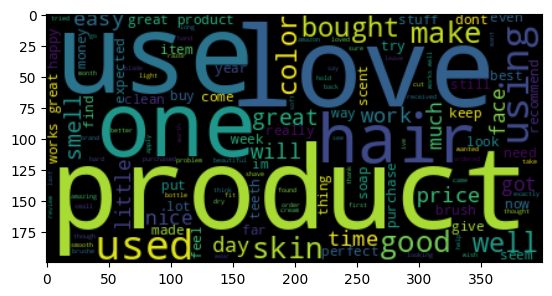

In [ ]:
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

In [ ]:
### stopwords

stopwordsList = set(stopwords.words('english'))
stopwordsList.update(
    [
        'br', 'href', 'http', 'www',  "ordered", 'bought', 'dress', 'order', 'color', 'shirt', 'one', 'tshirt', 'product',
        'item', 'would', 'could', 'make', 'fabric', 'jeans', 'sweater', 'jacket', 'pant', 'shoe', 'trouser',
        'clothing', 'apparel', 'fashion''style', 'brand', 'collection', 'designer','season','trend','outfit',
        'accessory','runway','model','fabric','garment','store','shop','boutique','retail','customer','color'
        'size','material','design','look','dress','skirt','blouse','coat', 'accessory','jewelry','handbag','hat','scarf','sunglasses',
        'watch','makeup','hair','model','photography','influencer','marketing','promotion','sale','discount','price', 'wear', 'picture',
        'received', 'money', 'actually', 'almost', 'also', 'another',
       'arm', 'around', 'arrived', 'baby', 'back','bag', 'band', 'belt', 'bit', 'black', 'boot', 'bottom', 'came',
       'cant', 'come', 'costume', 'cover', 'cut', 'daughter', 'day', 'different', 'easy', 'enough', 'er', 'even',  'extra', 'find'
       'first', 'foot', 'gave', 'get', 'gift', 'give', 'glass',
       'go', 'going', 'got', 'head', 'however', 'husband', 'im', 'ive', 'keep', 'know', 'made', 'make', 'many', 'month',
       'overall', 'pair', 'pant', 'part', 'piece',
       'pocket', 'purchase', 'purchased', 'purse','put', 'review', 'ring', 'run', 'said', 'say', 'see', 'seems',
       'shipping', 'shoe', 'short', 'side', 'since', 'sleeve', 'sock', 'something', 'son', 'stay', 'still', 'strap', 'sun',
       'support', 'theyre', 'thing', 'time', 'took', 'tried', 'true', 'two', 'use', 'usually', 'wash',
       'way', 'week', 'white', 'without', 'woman', 'worn', 'xl', 'year', 'samll', 'bought', 'ordered', 'product', 'item', 'meny','used','using','bottle','brush','buy'
    ]
)

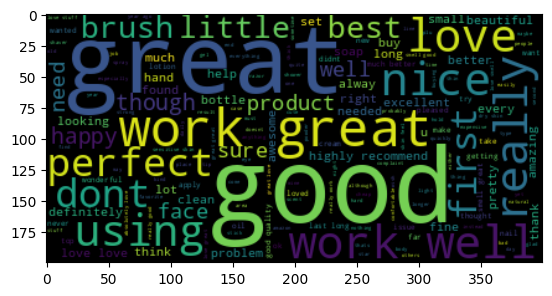

In [ ]:
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

In [ ]:
### NLP
def nlprocess(df):
    lemmatizer = WordNetLemmatizer()
    # toikenize and stopwords removal
    processed = [
           ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(review) if token.casefold() not in stopwordsList]) for review in df.reviewText
        ]
    return processed

In [ ]:
out = nlprocess(df)
out

['great',
 'wanted reading negro baseball great addition library library doesnt haveinformation book start tthank',
 'book informative covering aspect game',
 'already baseball fan knew negro league learned lot reading book',
 'good story league book teach high school reading class found informative exciting recommend anyone interested history league well written unlike book fact mckissacks continue write good book young audience enjoyed adult',
 'didnt like smudged eye throughly',
 'simply love appreciate print feed regarding',
 'burn eye u light u n forth lot dark eyeliner smudge lot waste',
 'smaller version full size shown pic',
 'great eye liner good seller',
 'vending resale bellydance weekend workshop nice quality love compact packaging ingredient detail sketchy havent gone blind yet',
 'love',
 'really nice eyeliner',
 'go easily make eye bold beautiful',
 'letz talk drama',
 'love love love movie breathtaking book really show behindthescenes work needed gorgeous film must buy 

In [ ]:
df['reviewText'] = out

### Binning

In [ ]:
df

,overall,reviewTime,reviewText,summary,reviewLength
0,1,"02 19, 2015",great,One Star,1
1,4,"12 18, 2014",wanted reading negro baseball great addition l...,... to reading about the Negro Baseball and th...,30
2,4,"08 10, 2014",book informative covering aspect game,Worth the Read,10
3,5,"03 11, 2013",already baseball fan knew negro league learned...,Good Read,23
4,5,"12 25, 2011",good story league book teach high school readi...,"More than facts, a good story read!",67
...,...,...,...,...,...
317929,1,"07 20, 2017",awful super frizzy comb fell completely apart ...,It was super frizzy and I tried to comb it and...,29
317930,5,"03 16, 2017",skeptical buying worried obviously fake shiny ...,Awesome,48
317931,5,"03 1, 2017",make good fast,Five Stars,5
317932,2,"02 21, 2017",lighter photo mix blend color full nice qualit...,Ok but color way off and volume as well,25


In [ ]:
### to set 0 as Positive reviw
df['sentiment'] = 0
df.sentiment

0         0
1         0
2         0
3         0
4         0
         ..
317929    0
317930    0
317931    0
317932    0
317933    0
Name: sentiment, Length: 317934, dtype: int64

In [ ]:
### setting negetive reviews as 1
df.loc[df['overall'] < 3,'sentiment'] = 1

In [ ]:
df.head().T

,0,1,2,3,4
overall,1,4,4,5,5
reviewTime,"02 19, 2015","12 18, 2014","08 10, 2014","03 11, 2013","12 25, 2011"
reviewText,great,wanted reading negro baseball great addition l...,book informative covering aspect game,already baseball fan knew negro league learned...,good story league book teach high school readi...
summary,One Star,... to reading about the Negro Baseball and th...,Worth the Read,Good Read,"More than facts, a good story read!"
reviewLength,1,30,10,23,67
sentiment,1,0,0,0,0


In [ ]:
neg = df[df['sentiment'] == 1]
pos = df[df['sentiment'] == 0]

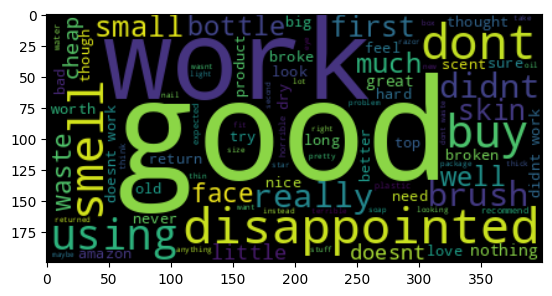

In [ ]:

text = " ".join(review for review in neg.reviewText)
cloud = WordCloud()
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

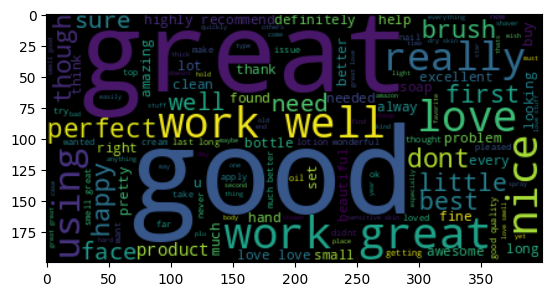

In [ ]:

text = " ".join(review for review in pos.reviewText)
cloud = WordCloud()
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

In [ ]:
df.to_parquet('/content/drive/MyDrive/Colab Notebooks/All_Beauty_v4.parquet')